In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [3]:
X = df.drop(columns=['id','booking_status'])
Y = df[['booking_status']]

In [4]:
df.isna().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [6]:
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

In [7]:
X_pre = num_pipe.fit_transform(X)
X_pre

array([[ 0.15103974, -0.31345354, -0.99881361, ..., -0.10147907,
        -0.99805198, -0.73769133],
       [ 0.15103974, -0.31345354,  0.13025905, ..., -0.10147907,
        -0.87015314, -0.73769133],
       [ 0.15103974, -0.31345354, -0.99881361, ..., -0.10147907,
        -1.41540612, -0.73769133],
       ...,
       [ 0.15103974, -0.31345354, -0.99881361, ..., -0.10147907,
        -0.2306589 , -0.73769133],
       [-1.75392524, -0.31345354, -0.99881361, ..., -0.10147907,
         0.41556686, -0.73769133],
       [ 0.15103974, -0.31345354,  0.13025905, ..., -0.10147907,
        -1.06536717, -0.73769133]])

In [8]:
cols = num_pipe.get_feature_names_out()
cols

array(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date',
       'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests'], dtype=object)

In [9]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.151040,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-1.170469,0.409661,-2.330398,-0.214091,0.428551,5.766758,33.699120,-0.101479,-0.998052,-0.737691
1,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.161740,0.409661,-0.209778,1.473487,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,-0.737691
2,0.151040,-0.313454,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,2.604122,0.409661,1.557404,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.415406,-0.737691
3,-1.753925,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-0.886758,0.409661,1.557404,-1.676659,0.428551,-0.173408,-0.060506,-0.101479,-1.307702,-0.737691
4,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,1.901012,0.409661,0.850531,0.010919,-1.149928,-0.173408,-0.060506,-0.101479,-0.122955,-0.737691


In [10]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [11]:
xtrain.shape

(33680, 17)

In [12]:
xtest.shape

(8420, 17)

In [13]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping

In [14]:
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=xtrain.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [17]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=100, callbacks=[early_stop])

Epoch 1/100


842/842 [==============================] - 4s 2ms/step - loss: 0.5565 - accuracy: 0.7271 - val_loss: 0.4784 - val_accuracy: 0.7732
Epoch 2/100
842/842 [==============================] - 2s 2ms/step - loss: 0.4968 - accuracy: 0.7634 - val_loss: 0.4730 - val_accuracy: 0.7751
Epoch 3/100
842/842 [==============================] - 2s 3ms/step - loss: 0.4827 - accuracy: 0.7725 - val_loss: 0.4677 - val_accuracy: 0.7822
Epoch 4/100
842/842 [==============================] - 2s 3ms/step - loss: 0.4776 - accuracy: 0.7748 - val_loss: 0.4616 - val_accuracy: 0.7852
Epoch 5/100
842/842 [==============================] - 2s 3ms/step - loss: 0.4723 - accuracy: 0.7804 - val_loss: 0.4586 - val_accuracy: 0.7862
Epoch 6/100
842/842 [==============================] - 2s 3ms/step - loss: 0.4717 - accuracy: 0.7775 - val_loss: 0.4582 - val_accuracy: 0.7870
Epoch 7/100
842/842 [==============================] - 2s 3ms/step - loss: 0.4695 - accuracy: 0.7820 - val_loss: 0.4552 - val_accuracy: 0.7885
Epoch 8/100

In [18]:
model.evaluate(xtrain, ytrain)

1053/1053 [==============================] - 1s 1ms/step - loss: 0.4084 - accuracy: 0.8161


[0.40835222601890564, 0.8160926103591919]

In [19]:
model.evaluate(xtest, ytest)

264/264 [==============================] - 0s 1ms/step - loss: 0.4205 - accuracy: 0.8110


[0.4205278158187866, 0.8110451102256775]

In [20]:
yprob_tr = model.predict(xtrain)
yprob_ts = model.predict(xtest)

264/264 [==============================] - 0s 1ms/step


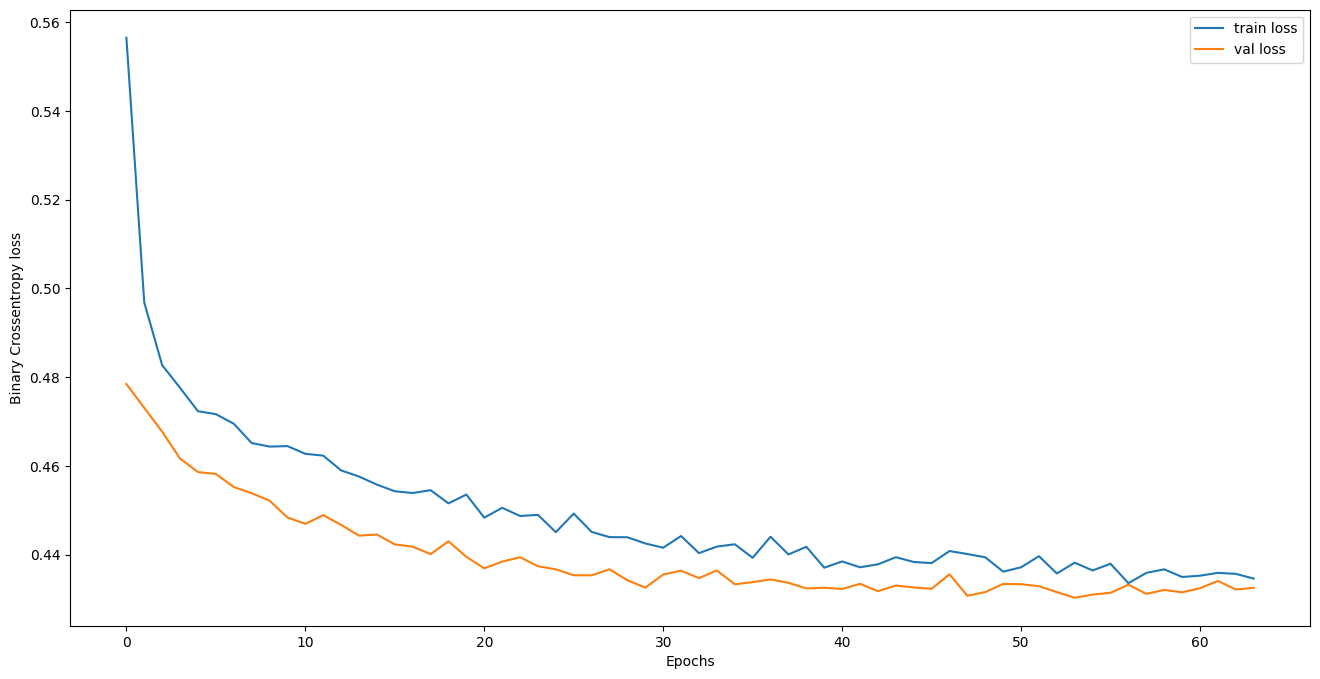

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'],label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy loss')
plt.legend()
plt.show()

In [22]:
ypred_ts = []
for i in yprob_ts:
    if i>=0.5:
        ypred_ts.append(1)
    else:
        ypred_ts.append(0)

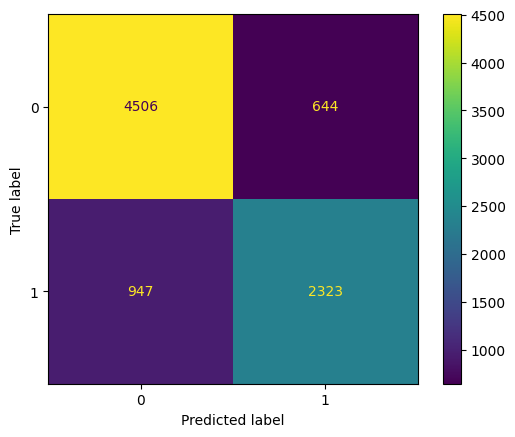

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

LogisticRegression()

In [26]:
lr.score(xtrain, ytrain)

0.7684679334916864

In [27]:
lr.score(xtest, ytest)

0.7679334916864609

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(xtrain, ytrain)

GradientBoostingClassifier()

In [29]:
gbc.score(xtrain, ytrain)

0.811520190023753

In [30]:
gbc.score(xtest, ytest)

0.8125890736342043

In [31]:
params = {'learning_rate':[0.001, 0.01, 0.1, 0.2],
          'max_depth':[2,3,4,5],
          'min_samples_split':[4,5,6,7]}

In [32]:
from sklearn.model_selection import RandomizedSearchCV
gbc = GradientBoostingClassifier(random_state=21)
rscv = RandomizedSearchCV(gbc,param_distributions=params,cv=5,scoring='f1',n_jobs=-1)
rscv.fit(xtrain, ytrain)


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=21),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.2],
                                        'max_depth': [2, 3, 4, 5],
                                        'min_samples_split': [4, 5, 6, 7]},
                   scoring='f1')

In [33]:
rscv.best_params_

{'min_samples_split': 6, 'max_depth': 3, 'learning_rate': 0.2}

In [34]:
rscv.best_score_

0.7542570817995793

In [35]:
best_gbc = rscv.best_estimator_
best_gbc

GradientBoostingClassifier(learning_rate=0.2, min_samples_split=6,
                           random_state=21)

In [36]:
best_gbc.score(xtrain, ytrain)

0.819833729216152

In [37]:
best_gbc.score(xtest, ytest)

0.8146080760095011

In [38]:
ypred_tr = best_gbc.predict(xtrain)
ypred_ts = best_gbc.predict(xtest)

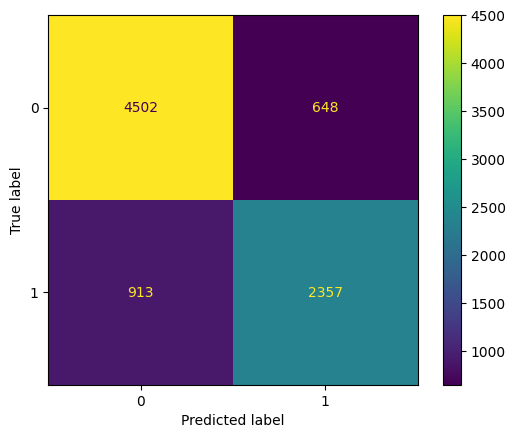

In [39]:
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_gbc.classes_)
cfd.plot()

In [40]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      5150
           1       0.78      0.72      0.75      3270

    accuracy                           0.81      8420
   macro avg       0.81      0.80      0.80      8420
weighted avg       0.81      0.81      0.81      8420



### Predicting the test data

In [41]:
xnew = pd.read_csv('test.csv')
xnew.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [42]:
xnew_pre = xnew.drop(columns=['id'])

In [43]:
xnew_pre = num_pipe.transform(xnew_pre)
xnew_pre

array([[ 2.05600472, -0.31345354,  0.13025905, ..., -0.10147907,
         0.29709213,  1.84284918],
       [ 0.15103974, -0.31345354, -0.99881361, ..., -0.10147907,
        -0.5268457 , -0.73769133],
       [ 0.15103974,  4.12977678, -0.99881361, ..., -0.10147907,
         3.64669564,  0.55257892],
       ...,
       [ 0.15103974, -0.31345354,  0.13025905, ..., -0.10147907,
        -0.5268457 , -0.73769133],
       [ 2.05600472, -0.31345354, -0.99881361, ..., -0.10147907,
         1.56665649, -0.73769133],
       [ 0.15103974, -0.31345354,  1.25933171, ..., -0.10147907,
        -0.54542469, -0.73769133]])

In [44]:
xnew_pre = pd.DataFrame(xnew_pre, columns=cols)

In [45]:
xnew_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2.056005,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,0.087728,0.409661,1.557404,-1.226638,0.428551,-0.173408,-0.060506,-0.101479,0.297092,1.842849
1,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-1.010111,-2.441040,0.850531,0.573445,-1.149928,-0.173408,-0.060506,-0.101479,-0.526846,-0.737691
2,0.151040,4.129777,-0.998814,-0.979466,-0.407020,-0.160945,3.088017,-1.059452,0.409661,0.143658,-0.664112,0.428551,-0.173408,-0.060506,-0.101479,3.646696,0.552579
3,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-0.195983,0.409661,-0.916652,1.585992,-1.149928,-0.173408,-0.060506,-0.101479,-0.641282,-0.737691
4,-1.753925,-0.313454,-0.998814,-0.278849,2.996268,-0.160945,-0.515173,-1.195140,0.409661,0.497095,0.573445,0.428551,-0.173408,-0.060506,-0.101479,1.061793,-0.737691


In [46]:
preds = best_gbc.predict(xnew_pre)

In [47]:
probs = best_gbc.predict_proba(xnew_pre)[:,1]

In [48]:
probs

array([0.07146749, 0.07009513, 0.38618645, ..., 0.13089283, 0.50577819,
       0.86844612])

In [49]:
df_final = xnew[['id']]
df_final

,id
0,42100
1,42101
2,42102
3,42103
4,42104
...,...
28063,70163
28064,70164
28065,70165
28066,70166


In [50]:
df_final['booking_status']=probs

In [51]:
df_final

,id,booking_status
0,42100,0.071467
1,42101,0.070095
2,42102,0.386186
3,42103,0.102579
4,42104,0.538090
...,...,...
28063,70163,0.947463
28064,70164,0.068066
28065,70165,0.130893
28066,70166,0.505778


In [52]:
df_final.to_csv('submission.csv',index=False)